#**HOUSEHOLD AIR POLLUTION**

In [2]:
#importing the libraries to read csv file and libraries for graph plotting

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [3]:
#importing the classifier libraries and model selectioin libraries

from scipy import stats
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.model_selection import RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import confusion_matrix, accuracy_score

In [4]:
#reading the dataset file
data = pd.read_csv("/content/drive/MyDrive/Dataset/air_pollution_dataset.csv")

In [5]:
 #prints information about the DataFrame such as columns, column labels, data types
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23463 entries, 0 to 23462
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Country             23036 non-null  object
 1   City                23462 non-null  object
 2   AQI Value           23463 non-null  int64 
 3   AQI Category        23463 non-null  object
 4   CO AQI Value        23463 non-null  int64 
 5   CO AQI Category     23463 non-null  object
 6   Ozone AQI Value     23463 non-null  int64 
 7   Ozone AQI Category  23463 non-null  object
 8   NO2 AQI Value       23463 non-null  int64 
 9   NO2 AQI Category    23463 non-null  object
 10  PM2.5 AQI Value     23463 non-null  int64 
 11  PM2.5 AQI Category  23463 non-null  object
dtypes: int64(5), object(7)
memory usage: 2.1+ MB


In [6]:
# returns the number of NaN values in all columns of a pandas DataFrame
data.isna().sum()

Country               427
City                    1
AQI Value               0
AQI Category            0
CO AQI Value            0
CO AQI Category         0
Ozone AQI Value         0
Ozone AQI Category      0
NO2 AQI Value           0
NO2 AQI Category        0
PM2.5 AQI Value         0
PM2.5 AQI Category      0
dtype: int64

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23463 entries, 0 to 23462
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Country             23036 non-null  object
 1   City                23462 non-null  object
 2   AQI Value           23463 non-null  int64 
 3   AQI Category        23463 non-null  object
 4   CO AQI Value        23463 non-null  int64 
 5   CO AQI Category     23463 non-null  object
 6   Ozone AQI Value     23463 non-null  int64 
 7   Ozone AQI Category  23463 non-null  object
 8   NO2 AQI Value       23463 non-null  int64 
 9   NO2 AQI Category    23463 non-null  object
 10  PM2.5 AQI Value     23463 non-null  int64 
 11  PM2.5 AQI Category  23463 non-null  object
dtypes: int64(5), object(7)
memory usage: 2.1+ MB


In [8]:
np.arange(0,12)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])

In [9]:
data = data.iloc[:,[3,  5,  7,  9, 2,  4,  6,  8,  10, 11]]
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23463 entries, 0 to 23462
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   AQI Category        23463 non-null  object
 1   CO AQI Category     23463 non-null  object
 2   Ozone AQI Category  23463 non-null  object
 3   NO2 AQI Category    23463 non-null  object
 4   AQI Value           23463 non-null  int64 
 5   CO AQI Value        23463 non-null  int64 
 6   Ozone AQI Value     23463 non-null  int64 
 7   NO2 AQI Value       23463 non-null  int64 
 8   PM2.5 AQI Value     23463 non-null  int64 
 9   PM2.5 AQI Category  23463 non-null  object
dtypes: int64(5), object(5)
memory usage: 1.8+ MB


In [10]:
#function to print the unique values of each column in a DataFrame
def unique(i):
    print("For {}".format(i))
    print(data[i].unique())
    print("-------------------------------")

for i in data.columns:
    unique(i)

For AQI Category
['Moderate' 'Good' 'Unhealthy for Sensitive Groups' 'Unhealthy'
 'Very Unhealthy' 'Hazardous']
-------------------------------
For CO AQI Category
['Good' 'Unhealthy for Sensitive Groups' 'Moderate']
-------------------------------
For Ozone AQI Category
['Good' 'Moderate' 'Unhealthy for Sensitive Groups' 'Unhealthy'
 'Very Unhealthy']
-------------------------------
For NO2 AQI Category
['Good' 'Moderate']
-------------------------------
For AQI Value
[ 51  41  66  34  22  54  62  64 142  68 158  83  59 154  55  72 161  28
 118  33 150  81  67  31  56  77  44  30  79  61  32  29 247  45  36 124
 157  60 153  47  37  58  89  52  38  88  42 189  49 203  35  90  48  19
  73 170 155  46 172  21 166  27  23 168  40 133  50  25  65  53  57 167
  80 163 126  63  86  78 112 121 160 144  69  84  20  75  98 103 307 151
 102 115  17 127 125  92 143 187 156 105 198 139 145  13  26 107  76 104
  39  97 194  70 500 380 222 117 182 171  91  71  24 152  93 132 179 202
  94 101  74 44

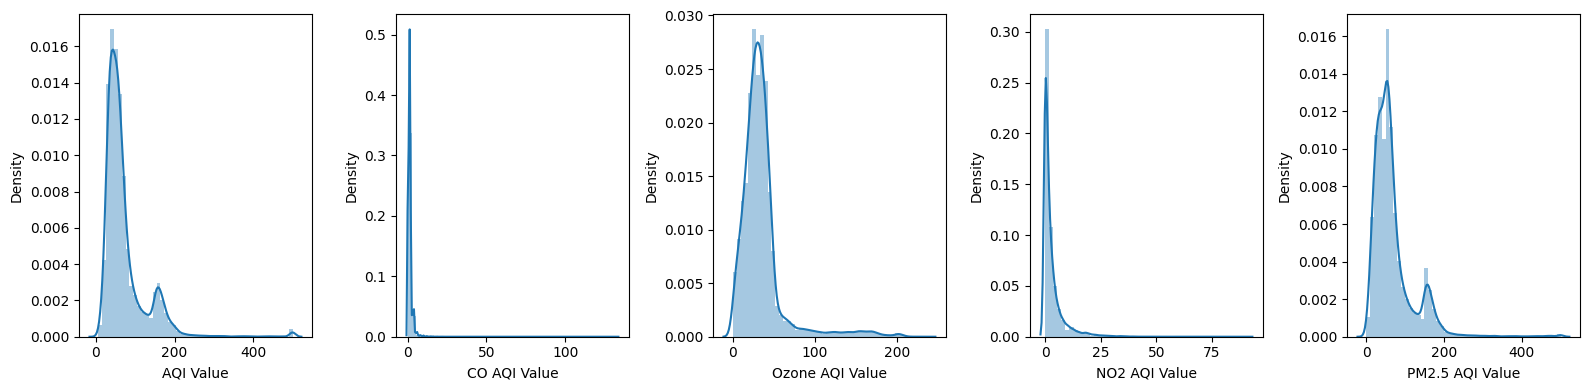

In [11]:
#to create subplots with distribution plots for selected columns of a DataFrame
plt.figure(figsize = (16,4))

for i,j in enumerate(data.iloc[:,4:-1].columns):

    plt.subplot(1,5,i+1)

    sns.distplot(data[j])
    plt.tight_layout()

plt.subplots_adjust()
plt.show()

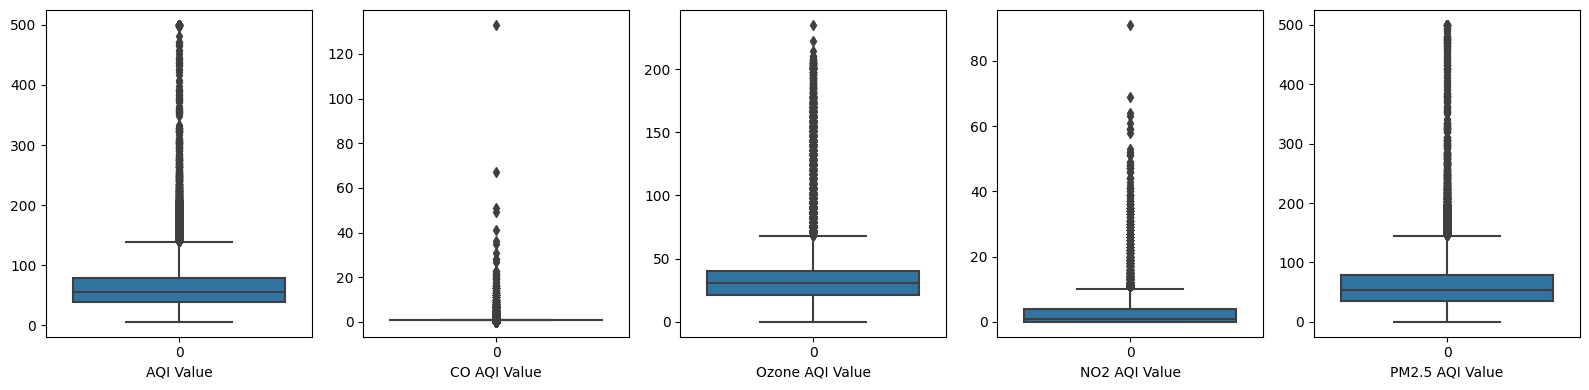

In [12]:
#to create boxplots for selected columns in a DataFrame using Matplotlib and Seaborn.
plt.figure(figsize = (16,4))

for i,j in enumerate(data.iloc[:,4:-1].columns):

    plt.subplot(1,5,i+1)

    sns.boxplot(data[j])
    plt.xlabel("{}".format(j))
    plt.tight_layout()

plt.subplots_adjust()
plt.show()

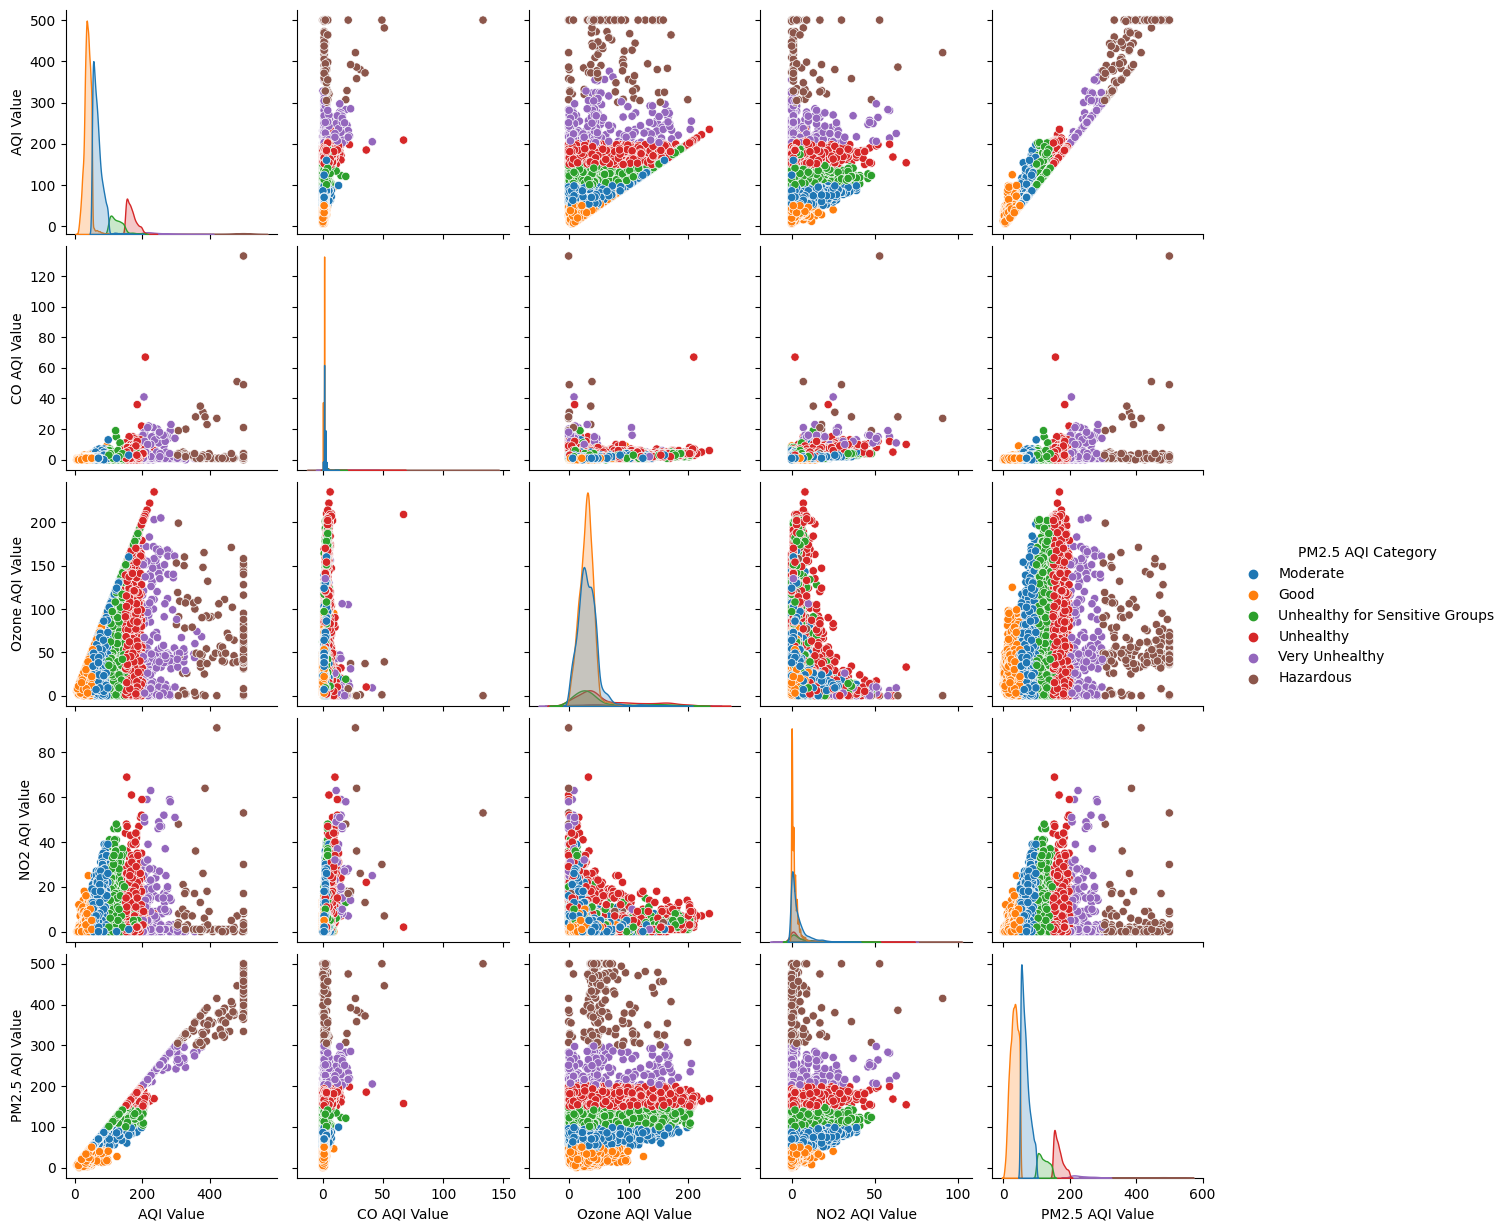

In [13]:
#to create a pairplot using Seaborn to visualize the relationships between variables in your DataFrame
sns.pairplot(data.iloc[:,4:], hue = "PM2.5 AQI Category")
plt.show()

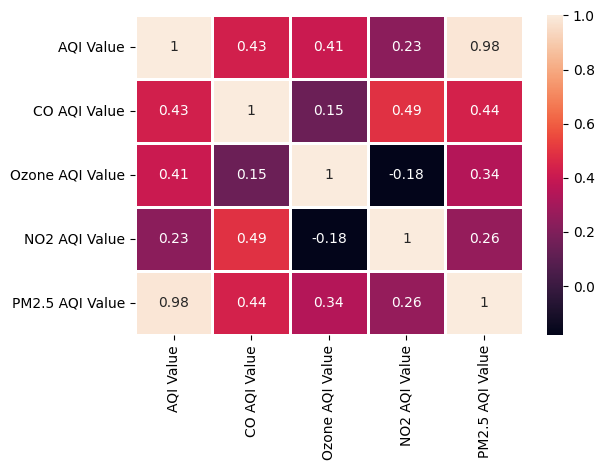

In [14]:
#to create a heatmap of the correlation matrix for a subset of columns in the DataFrame, and annotating the heatmap with correlation values.
sns.heatmap(data.iloc[:,4:-1].corr(), annot = True, linewidths = 1)
plt.tight_layout()
plt.show()

In [15]:
#preprocessing the data again
def label(i):
    data[i] = LabelEncoder().fit_transform(data[i])
    return data[i]

for i in data.iloc[:,:4].columns:
    label(i)

data

,AQI Category,CO AQI Category,Ozone AQI Category,NO2 AQI Category,AQI Value,CO AQI Value,Ozone AQI Value,NO2 AQI Value,PM2.5 AQI Value,PM2.5 AQI Category
0,2,0,0,0,51,1,36,0,51,Moderate
1,0,0,0,0,41,1,5,1,41,Good
2,2,0,0,0,66,1,39,2,66,Moderate
3,0,0,0,0,34,1,34,0,20,Good
4,0,0,0,0,22,0,22,0,6,Good
...,...,...,...,...,...,...,...,...,...,...
23458,3,0,2,0,184,3,154,2,184,Unhealthy
23459,0,0,0,0,50,1,20,5,50,Good
23460,0,0,0,0,50,1,22,1,50,Good
23461,2,0,0,0,71,1,44,2,71,Moderate


In [16]:
col = list(data.columns)

predictor = col[:-1]

display(predictor)

target = col[-1]
display(target)

['AQI Category',
 'CO AQI Category',
 'Ozone AQI Category',
 'NO2 AQI Category',
 'AQI Value',
 'CO AQI Value',
 'Ozone AQI Value',
 'NO2 AQI Value',
 'PM2.5 AQI Value']

'PM2.5 AQI Category'

In [17]:
#to split the dataset into training and testing sets
from sklearn.model_selection import train_test_split

train, test = train_test_split(data, test_size = 0.2, random_state = 0, stratify = data[target])

display(train)
display(test)

,AQI Category,CO AQI Category,Ozone AQI Category,NO2 AQI Category,AQI Value,CO AQI Value,Ozone AQI Value,NO2 AQI Value,PM2.5 AQI Value,PM2.5 AQI Category
21696,2,0,0,0,51,1,29,5,51,Moderate
19023,0,0,0,0,30,1,30,0,7,Good
22593,4,0,0,0,101,2,10,14,101,Unhealthy for Sensitive Groups
18396,3,0,1,0,152,3,87,1,152,Unhealthy
3384,0,0,0,0,33,1,33,3,20,Good
...,...,...,...,...,...,...,...,...,...,...
21848,0,0,0,0,30,0,30,3,16,Good
13248,0,0,0,0,50,1,31,0,50,Good
13977,0,0,0,0,25,0,7,0,25,Good
12775,0,0,0,0,25,1,25,1,18,Good


,AQI Category,CO AQI Category,Ozone AQI Category,NO2 AQI Category,AQI Value,CO AQI Value,Ozone AQI Value,NO2 AQI Value,PM2.5 AQI Value,PM2.5 AQI Category
654,0,0,0,0,33,1,17,8,33,Good
8206,3,0,0,0,162,1,39,0,162,Unhealthy
13481,0,0,0,0,48,1,10,2,48,Good
7400,0,0,0,0,45,1,10,5,45,Good
14864,2,0,0,0,95,3,14,10,95,Moderate
...,...,...,...,...,...,...,...,...,...,...
23022,0,0,0,0,31,1,31,0,27,Good
1,0,0,0,0,41,1,5,1,41,Good
7503,3,0,0,0,151,5,19,10,151,Unhealthy
16883,4,0,0,0,123,1,21,1,123,Unhealthy for Sensitive Groups


The below code is correctly assessing the performance of Decision Tree Classifier model on both the training and test datasets using confusion matrices and accuracy scores. This helps to understand how well the model is performing and whether it might be overfitting or underfitting the data.

In [18]:
model = DecisionTreeClassifier(random_state = 0)

model.fit(train[predictor], train[target])

print("For Test Data")
test_pred = model.predict(test[predictor])

from sklearn.metrics import confusion_matrix, accuracy_score

display(pd.crosstab(test[target], test_pred, rownames=["Actual"], colnames=["Prediction"]))
display(accuracy_score(test_pred, test[target]))

print()
print("For Train Data")
train_pred = model.predict(train[predictor])

from sklearn.metrics import confusion_matrix, accuracy_score

display(pd.crosstab(train[target], train_pred, rownames=["Actual"], colnames=["Prediction"]))
print(accuracy_score(train_pred, train[target]))

For Test Data


Prediction,Good,Hazardous,Moderate,Unhealthy,Unhealthy for Sensitive Groups,Very Unhealthy
Actual,,,,,,
Good,2042,0,0,0,0,0
Hazardous,0,34,0,0,0,0
Moderate,0,0,1815,0,0,0
Unhealthy,0,0,0,426,0,0
Unhealthy for Sensitive Groups,0,0,0,0,325,0
Very Unhealthy,0,0,0,0,0,51


1.0


For Train Data


Prediction,Good,Hazardous,Moderate,Unhealthy,Unhealthy for Sensitive Groups,Very Unhealthy
Actual,,,,,,
Good,8166,0,0,0,0,0
Hazardous,0,138,0,0,0,0
Moderate,0,0,7260,0,0,0
Unhealthy,0,0,0,1703,0,0
Unhealthy for Sensitive Groups,0,0,0,0,1299,0
Very Unhealthy,0,0,0,0,0,204


1.0


## RandomizedSearchCV
Defining a parameter grid for hyperparameter tuning using RandomizedSearchCV with a Decision Tree model. This parameter grid includes various hyperparameters that it will search over to find the best combination

In [19]:
from sklearn.model_selection import RandomizedSearchCV

param = {"criterion":["gini", "entropy", "log_loss"],
            "splitter":["best", "random"],
            "max_depth":list(range(1,50)),
            "min_samples_split":list(range(2,50)),
            "min_samples_leaf":list(range(1,50)),
            "max_features":["auto", "sqrt", "log2"],
            "max_leaf_nodes":list(range(1,50))}

In [20]:
model = RandomizedSearchCV(estimator = DecisionTreeClassifier(random_state = 0),
                            param_distributions = param,
                            scoring = "accuracy",
                            n_jobs = -1,
                            random_state = 0,
                            cv = 5).fit(train[predictor], train[target])

model

RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=0),
                   n_jobs=-1,
                   param_distributions={'criterion': ['gini', 'entropy',
                                                      'log_loss'],
                                        'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9,
                                                      10, 11, 12, 13, 14, 15,
                                                      16, 17, 18, 19, 20, 21,
                                                      22, 23, 24, 25, 26, 27,
                                                      28, 29, 30, ...],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'max_leaf_nodes': [1, 2, 3, 4, 5, 6, 7,
                                                           8, 9, 10, 11, 12, 13,
                                                           14, 15, 16, 17, 18,
                                                           19, 20, 21, 22, 23,
                                                           24, 25, 26, 27, 28,
                                                           29, 30, ...],
                                        'min_samples_leaf': [1, 2, 3, 4, 5, 6,
                                                             7, 8, 9, 10, 11,
                                                             12, 13, 14, 15, 16,
                                                             17, 18, 19, 20, 21,
                                                             22, 23, 24, 25, 26,
                                                             27, 28, 29, 30, ...],
                                        'min_samples_split': [2, 3, 4, 5, 6, 7,
                                                              8, 9, 10, 11, 12,
                                                              13, 14, 15, 16,
                                                              17, 18, 19, 20,
                                                              21, 22, 23, 24,
                                                              25, 26, 27, 28,
                                                              29, 30, 31, ...],
                                        'splitter': ['best', 'random']},
                   random_state=0, scoring='accuracy')

In [21]:
# this attribute contains a dictionary of the best hyperparameters found during the hyperparameter tuning process using RandomizedSearchCV
model.best_params_

{'splitter': 'best',
 'min_samples_split': 27,
 'min_samples_leaf': 46,
 'max_leaf_nodes': 40,
 'max_features': 'auto',
 'max_depth': 10,
 'criterion': 'entropy'}

In [22]:
model.best_score_

0.9851891315929674

In [23]:
model = model.best_estimator_
model

DecisionTreeClassifier(criterion='entropy', max_depth=10, max_features='auto',
                       max_leaf_nodes=40, min_samples_leaf=46,
                       min_samples_split=27, random_state=0)

In [24]:
# evaluating the tuned DecisionTreeClassifier model on both the test and training datasets and displaying confusion matrices and accuracy scores
print("For Test Data")
test_pred = model.predict(test[predictor])

from sklearn.metrics import confusion_matrix, accuracy_score

display(pd.crosstab(test[target], test_pred, rownames=["Actual"], colnames=["Prediction"]))
display(accuracy_score(test_pred, test[target]))

print()
print("For Train Data")
train_pred = model.predict(train[predictor])

from sklearn.metrics import confusion_matrix, accuracy_score

display(pd.crosstab(train[target], train_pred, rownames=["Actual"], colnames=["Prediction"]))
print(accuracy_score(train_pred, train[target]))

For Test Data


Prediction,Good,Hazardous,Moderate,Unhealthy,Unhealthy for Sensitive Groups,Very Unhealthy
Actual,,,,,,
Good,2039,0,3,0,0,0
Hazardous,0,19,0,15,0,0
Moderate,15,0,1793,0,7,0
Unhealthy,0,0,0,421,5,0
Unhealthy for Sensitive Groups,0,0,0,9,315,1
Very Unhealthy,0,2,0,9,0,40


0.9859365011719582


For Train Data


Prediction,Good,Hazardous,Moderate,Unhealthy,Unhealthy for Sensitive Groups,Very Unhealthy
Actual,,,,,,
Good,8157,0,9,0,0,0
Hazardous,0,83,0,54,1,0
Moderate,34,0,7205,0,21,0
Unhealthy,0,0,0,1681,22,0
Unhealthy for Sensitive Groups,0,0,0,42,1246,11
Very Unhealthy,0,10,0,41,1,152


0.9868939797549281


#### Test Accuracy  : 98%
#### Train Accuracy   : 98%

## Bagging
Using Scikit-Learn's BaggingClassifier to create an ensemble model based on the previously tuned DecisionTreeClassifier. This is a common technique to improve the stability and generalization of machine learning models.

In [25]:
from sklearn.ensemble import BaggingClassifier

model = BaggingClassifier(base_estimator = model,random_state = 0)
model.fit(train[predictor], train[target])

BaggingClassifier(base_estimator=DecisionTreeClassifier(criterion='entropy',
                                                        max_depth=10,
                                                        max_features='auto',
                                                        max_leaf_nodes=40,
                                                        min_samples_leaf=46,
                                                        min_samples_split=27,
                                                        random_state=0),
                  random_state=0)

In [26]:
print("For Test Data")
test_pred = model.predict(test[predictor])

from sklearn.metrics import accuracy_score

display(pd.crosstab(test[target], test_pred, rownames=["Actual"], colnames=["Prediction"]))
display(accuracy_score(test_pred, test[target]))

print()
print("For Train Data")
train_pred = model.predict(train[predictor])

from sklearn.metrics import confusion_matrix, accuracy_score

display(pd.crosstab(train[target], train_pred, rownames=["Actual"], colnames=["Prediction"]))
print(accuracy_score(train_pred, train[target]))

For Test Data


Prediction,Good,Hazardous,Moderate,Unhealthy,Unhealthy for Sensitive Groups,Very Unhealthy
Actual,,,,,,
Good,2042,0,0,0,0,0
Hazardous,0,34,0,0,0,0
Moderate,0,0,1815,0,0,0
Unhealthy,0,0,0,426,0,0
Unhealthy for Sensitive Groups,0,0,0,0,325,0
Very Unhealthy,0,3,0,0,0,48


0.9993607500532709


For Train Data


Prediction,Good,Hazardous,Moderate,Unhealthy,Unhealthy for Sensitive Groups,Very Unhealthy
Actual,,,,,,
Good,8166,0,0,0,0,0
Hazardous,0,138,0,0,0,0
Moderate,0,0,7260,0,0,0
Unhealthy,0,0,0,1703,0,0
Unhealthy for Sensitive Groups,0,0,0,0,1299,0
Very Unhealthy,0,16,0,0,0,188


0.9991475759190197


### Train Accuracy  : 99%
### Test Accuracy   : 99%

# **..................END...................**